In [1]:
  #conda install datasets matplotlib pandas, conda activate python_course 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)
  

c:\Users\seane\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#EXERCISE: SKill Pay Analysis

#Want to find 1. Top 10 highest paid skills for data analysts and 
#2. top 10 most in demand skills for data analysts (and their median avg salaries)
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop Nan values

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])




In [13]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#Skills with highest median salary 
df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)

df_DA_top_pay 

#Skills with highest count

df_DA_top_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False).head(10)

df_DA_top_skills


,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


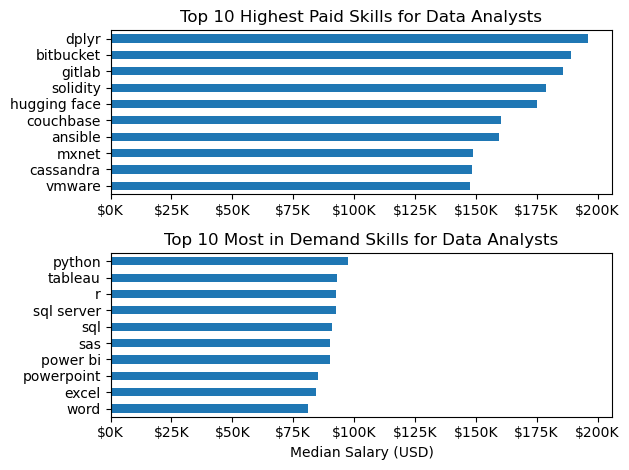

In [25]:
#Now we have the two dataframes, we need to plot them

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))

df_DA_top_skills.plot(kind = 'barh', y = 'median', ax = ax[1],legend = False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim()) # or ax[1].set_xlim(0, 200000) 
ax[1].set_title('Top 10 Most in Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, poss: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()